Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Load the datasets

In [2]:
tracking_femenino = pd.read_csv('DATA TRACKING FEMENINO.csv')
print(tracking_femenino)

                       Name        Date Position Name  Total Distance (m)  \
0    USER TVE0A- 17/05/2023  17/05/2023      INTERIOR          4814.25244   
1    USER TVE0A- 18/05/2023  18/05/2023      INTERIOR          3946.97888   
2    USER TVE0A- 19/05/2023  19/05/2023      INTERIOR          2552.32014   
3    USER TVE0A- 20/05/2023  20/05/2023      INTERIOR          8057.70227   
4    USER TVE0A- 22/05/2023  22/05/2023      INTERIOR          5796.52350   
..                      ...         ...           ...                 ...   
134                     NaN         NaN           NaN                 NaN   
135                     NaN         NaN           NaN                 NaN   
136                     NaN         NaN           NaN                 NaN   
137                     NaN         NaN           NaN                 NaN   
138                     NaN         NaN           NaN                 NaN   

     Total Player Load  Velocity Band 5 Total Distance (m)  \
0            

In [3]:
# Load each CSV file into a DataFrame
biomechanics_ave0e = pd.read_csv('BIOMECHANICS AVE0E.csv', delimiter=';')
biomechanics_mve0k = pd.read_csv('BIOMECHANICS MVE0K.csv', delimiter=';')
biomechanics_tve0a = pd.read_csv('BIOMECHANICS TVE0A.csv', delimiter=';')
biomechanics_tve0ms = pd.read_csv('BIOMECHANICS TVE0MS.csv', delimiter=';')
biomechanics_bve0m = pd.read_csv('BIOMECHANICS USER BVE0M.csv', delimiter=';')
biomechanics_lve0k = pd.read_csv('BIOMECHANICS USER LVE0K.csv', delimiter=';')
biomechanics_vve0a = pd.read_csv('BIOMECHANICS VVE0A.csv', delimiter=';')
biomechanics_zve0a = pd.read_csv('BIOMECHANICS ZVE0A.csv', delimiter=';')

print(biomechanics_zve0a)

     Player_ID        Date  Seconds  Left Force  Right Force
0        ZVE0A  2024-01-17     0.00       26.25         9.00
1        ZVE0A  2024-01-17     0.69       25.25         9.75
2        ZVE0A  2024-01-17     0.70       22.50        11.00
3        ZVE0A  2024-01-17     0.72       19.00         8.50
4        ZVE0A  2024-01-17     0.72       26.00        10.00
...        ...         ...      ...         ...          ...
7529     ZVE0A  2023-05-23    35.55       12.50        19.25
7530     ZVE0A  2023-05-23    35.55        9.00        16.25
7531     ZVE0A  2023-05-23    35.58        7.50        14.00
7532     ZVE0A  2023-05-23    35.61        6.00        12.50
7533     ZVE0A  2023-05-23    35.61        4.00        12.50

[7534 rows x 5 columns]



# Tracking Data


Create a Player ID column

In [4]:
# Convert 'Date' from string to datetime
tracking_femenino['Date'] = pd.to_datetime(tracking_femenino['Date'], format='%d/%m/%Y')

# Create a Player_ID column by extracting the unique identifier from the 'Name' column
tracking_femenino['Player_ID'] = tracking_femenino['Name'].str.extract(r'(USER \w+)')

print(tracking_femenino)

                       Name       Date Position Name  Total Distance (m)  \
0    USER TVE0A- 17/05/2023 2023-05-17      INTERIOR          4814.25244   
1    USER TVE0A- 18/05/2023 2023-05-18      INTERIOR          3946.97888   
2    USER TVE0A- 19/05/2023 2023-05-19      INTERIOR          2552.32014   
3    USER TVE0A- 20/05/2023 2023-05-20      INTERIOR          8057.70227   
4    USER TVE0A- 22/05/2023 2023-05-22      INTERIOR          5796.52350   
..                      ...        ...           ...                 ...   
134                     NaN        NaT           NaN                 NaN   
135                     NaN        NaT           NaN                 NaN   
136                     NaN        NaT           NaN                 NaN   
137                     NaN        NaT           NaN                 NaN   
138                     NaN        NaT           NaN                 NaN   

     Total Player Load  Velocity Band 5 Total Distance (m)  \
0            453.79324   

In [5]:
# Agrupar los datos por 'Player_ID' y calcular la suma o el promedio
grouped_data = tracking_femenino.groupby('Player_ID').agg({
    'Acceleration B2 Distance (Gen 2) (m)': 'sum',  # Cambia 'sum' por 'mean' si deseas el promedio
    'Acceleration B3 Distance (Gen 2) (m)': 'sum',
    'Deceleration B2 Distance (Gen 2) (m)': 'sum',
    'Deceleration B3 Distance (Gen 2) (m)': 'sum',
    'Velocity Band 6 Total Distance (m)': 'sum',
    'Velocity Band 7 Total Distance (m)': 'sum',
    'Velocity Band 8 Total Distance (m)': 'sum'
}).reset_index()

# Mostrar el DataFrame agrupado
print(grouped_data)

     Player_ID  Acceleration B2 Distance (Gen 2) (m)  \
0   USER AVE0E                                206.36   
1   USER BVE0M                                 78.12   
2   USER LVE0K                                119.27   
3   USER MVE0K                                 35.38   
4   USER TVE0A                                 31.28   
5  USER TVE0MS                                 88.97   
6   USER VVE0A                                 11.13   
7   USER ZVE0A                                 64.83   

   Acceleration B3 Distance (Gen 2) (m)  Deceleration B2 Distance (Gen 2) (m)  \
0                                  1.07                                118.73   
1                                 11.10                                 90.84   
2                                  1.77                                 89.01   
3                                  0.00                                 27.08   
4                                  1.74                                 26.98   
5        

<ipython-input-6-6b9df1e72c63>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped_data['Player_ID'], rotation=45)


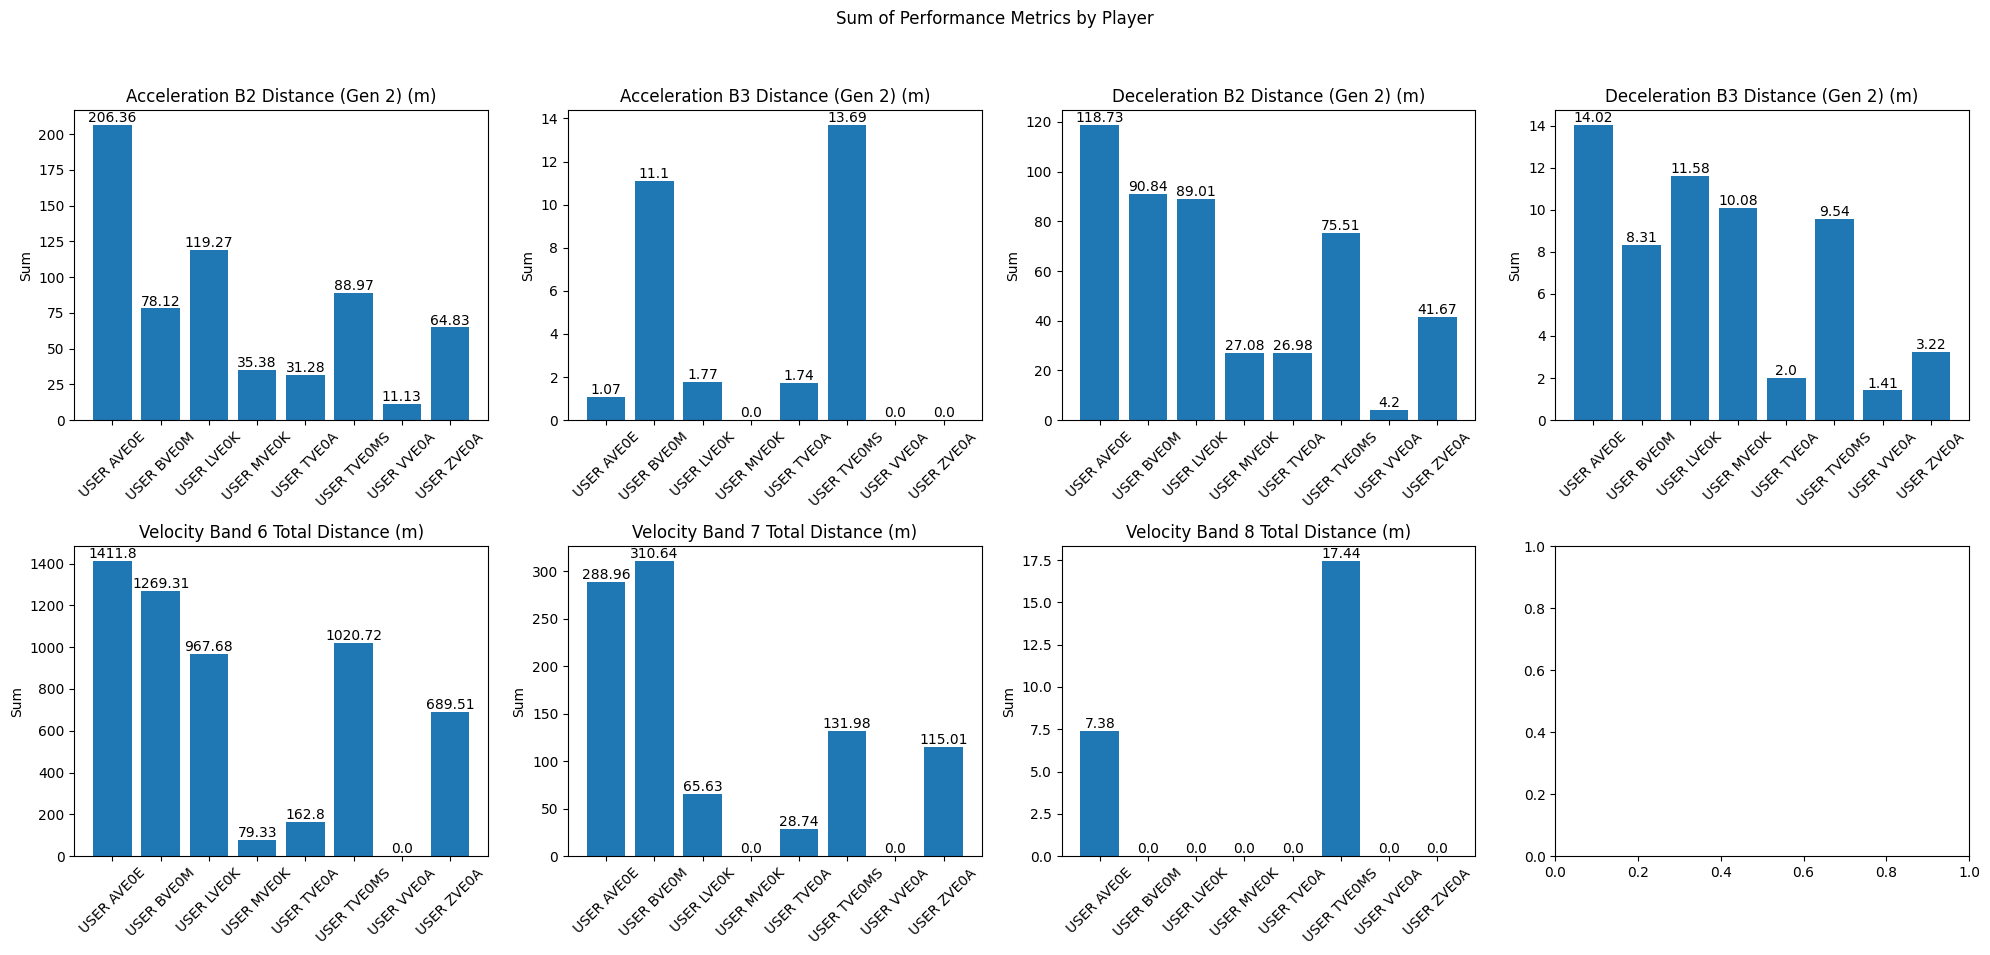

In [6]:
# Plotting
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Sum of Performance Metrics by Player')

metrics = [
    'Acceleration B2 Distance (Gen 2) (m)',
    'Acceleration B3 Distance (Gen 2) (m)',
    'Deceleration B2 Distance (Gen 2) (m)',
    'Deceleration B3 Distance (Gen 2) (m)',
    'Velocity Band 6 Total Distance (m)',
    'Velocity Band 7 Total Distance (m)',
    'Velocity Band 8 Total Distance (m)'
]

for ax, metric in zip(axes.flatten(), metrics):
    ax.bar(grouped_data['Player_ID'], grouped_data[metric])
    ax.set_title(metric)
    ax.set_xticklabels(grouped_data['Player_ID'], rotation=45)
    ax.set_ylabel('Sum')
    for i, v in enumerate(grouped_data[metric]):
        ax.text(i, v + max(grouped_data[metric])*0.01, str(round(v, 2)), ha='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the title
plt.show()

# NORDIC TESTS

Calculate average forces for each player

In [7]:
# List of dataframes for convenience if they were loaded as above
dataframe_list = [biomechanics_ave0e, biomechanics_mve0k, biomechanics_tve0a, biomechanics_tve0ms, biomechanics_bve0m, biomechanics_lve0k, biomechanics_vve0a, biomechanics_zve0a]

# Dictionary to store the average forces for each player
average_forces = {}

# Iterate over each dataframe to calculate averages
for dataframe in dataframe_list:
    player_id = dataframe.iloc[0]['Player_ID']  # Assuming the player ID is in the first row
    average_left_force = dataframe['Left Force'].mean()
    average_right_force = dataframe['Right Force'].mean()

    # Store the averages in the dictionary with the player ID as the key
    average_forces[player_id] = {
        'Average Left Force': average_left_force,
        'Average Right Force': average_right_force
    }

# Now you have a dictionary with the player ID as keys and their average forces as values
print(average_forces)

{'USER AVE0E': {'Average Left Force': 69.21572157215722, 'Average Right Force': 75.04361686168617}, 'MVE0K': {'Average Left Force': 58.70808871493803, 'Average Right Force': 63.669384648836704}, 'TVE0A': {'Average Left Force': 93.89849042709868, 'Average Right Force': 93.75452871870398}, 'TVE0MS': {'Average Left Force': 48.45762021189894, 'Average Right Force': 55.19865525672372}, 'USER BVE0M': {'Average Left Force': 96.49545047732697, 'Average Right Force': 113.52692422434367}, 'USER LVE0K': {'Average Left Force': 92.00588686972101, 'Average Right Force': 98.39230867673406}, 'VVE0A': {'Average Left Force': 79.16759234770343, 'Average Right Force': 89.41820946839461}, 'ZVE0A': {'Average Left Force': 68.51738784178391, 'Average Right Force': 101.39099415980887}}


In [8]:
import numpy as np

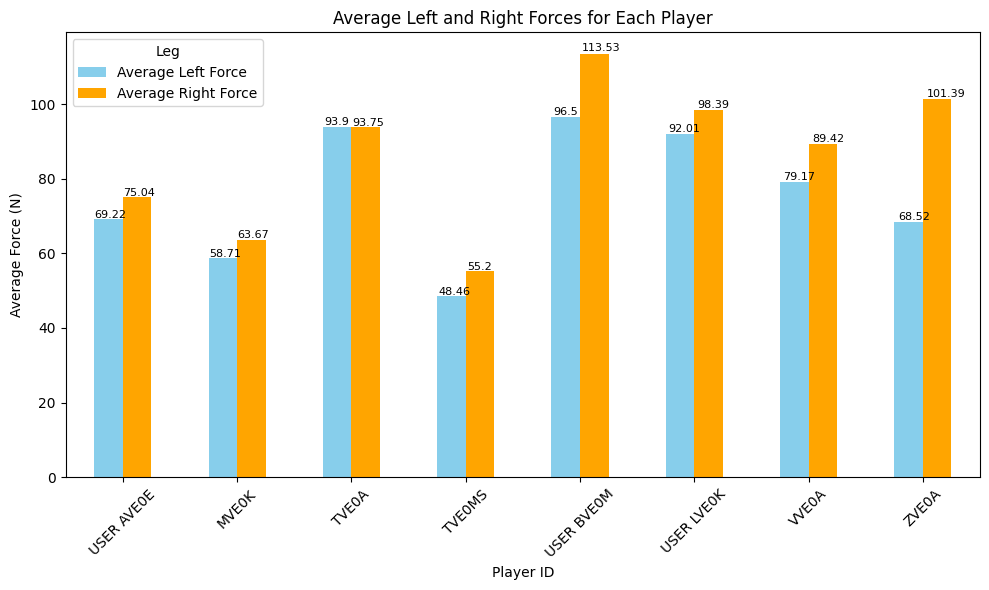

In [9]:
import matplotlib.pyplot as plt

# Convert the dictionary to a DataFrame
average_forces_df = pd.DataFrame(average_forces).T

# Plot
ax = average_forces_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])

# Add numbers to each bar
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)),
                (p.get_x() * 1.005, p.get_height() * 1.005),
                fontsize=8)

plt.title('Average Left and Right Forces for Each Player')
plt.xlabel('Player ID')
plt.ylabel('Average Force (N)')
plt.legend(title='Leg')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels

# Display the plot
plt.show()

# DATA ANALYSIS

In [10]:
from scipy.stats import pearsonr

In [11]:
# Convert the dictionary 'average_forces' to a DataFrame
average_forces_df = pd.DataFrame.from_dict(average_forces, orient='index').reset_index()
average_forces_df.columns = ['Player_ID', 'Average Left Force', 'Average Right Force']

# Assuming 'grouped_data' contains the grouped training data with distances of acceleration/deceleration

# Merge average leg strength data with grouped training data
merged_data = pd.merge(average_forces_df, grouped_data, on='Player_ID', how='inner')

# Calculate Pearson correlation coefficient for each distance metric with both left and right forces
correlations_left = {}
correlations_right = {}
for column in ['Acceleration B2 Distance (Gen 2) (m)', 'Acceleration B3 Distance (Gen 2) (m)',
               'Deceleration B2 Distance (Gen 2) (m)', 'Deceleration B3 Distance (Gen 2) (m)']:
    correlation_left, _ = pearsonr(merged_data['Average Left Force'], merged_data[column])
    correlation_right, _ = pearsonr(merged_data['Average Right Force'], merged_data[column])
    correlations_left[column] = correlation_left
    correlations_right[column] = correlation_right

# Print correlations for left force
print("Correlation for left force:")
for metric, correlation in correlations_left.items():
    print(f"Pearson correlation coefficient between Average Left Force and {metric}: {correlation}")

# Print correlations for right force
print("\nCorrelation for right force:")
for metric, correlation in correlations_right.items():
    print(f"Pearson correlation coefficient between Average Right Force and {metric}: {correlation}")

Correlation for left force:
Pearson correlation coefficient between Average Left Force and Acceleration B2 Distance (Gen 2) (m): -0.9863241407233142
Pearson correlation coefficient between Average Left Force and Acceleration B3 Distance (Gen 2) (m): 0.6744488472055846
Pearson correlation coefficient between Average Left Force and Deceleration B2 Distance (Gen 2) (m): -0.9782308378529474
Pearson correlation coefficient between Average Left Force and Deceleration B3 Distance (Gen 2) (m): -0.8990284516403497

Correlation for right force:
Pearson correlation coefficient between Average Right Force and Acceleration B2 Distance (Gen 2) (m): -0.9966939961130108
Pearson correlation coefficient between Average Right Force and Acceleration B3 Distance (Gen 2) (m): 0.8344462753762607
Pearson correlation coefficient between Average Right Force and Deceleration B2 Distance (Gen 2) (m): -0.8978439842187845
Pearson correlation coefficient between Average Right Force and Deceleration B3 Distance (Gen 

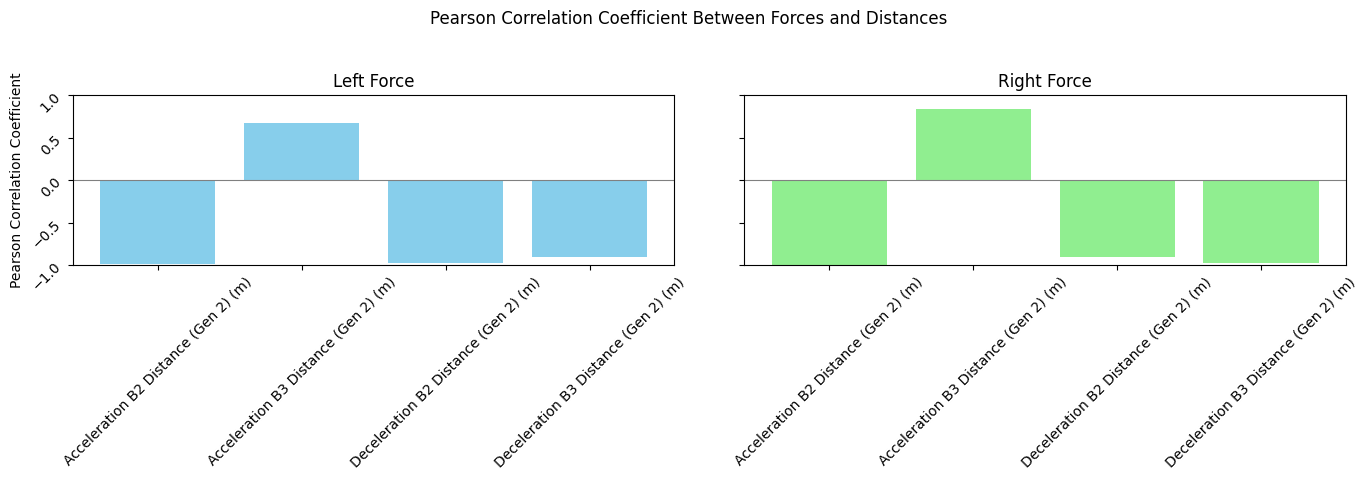

In [12]:
# Convert the dictionaries to DataFrames for easier plotting
df_left = pd.DataFrame(list(correlations_left.items()), columns=['Metric', 'Correlation with Left Force'])
df_right = pd.DataFrame(list(correlations_right.items()), columns=['Metric', 'Correlation with Right Force'])

# Setting up the matplotlib figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
fig.suptitle('Pearson Correlation Coefficient Between Forces and Distances')

# Bar plot for left force correlations
axes[0].bar(df_left['Metric'], df_left['Correlation with Left Force'], color='skyblue')
axes[0].set_title('Left Force')
axes[0].tick_params(labelrotation=45)
axes[0].set_ylim([-1, 1])  # Pearson correlation ranges from -1 to 1
axes[0].axhline(0, color='grey', linewidth=0.8)
axes[0].set_ylabel('Pearson Correlation Coefficient')

# Bar plot for right force correlations
axes[1].bar(df_right['Metric'], df_right['Correlation with Right Force'], color='lightgreen')
axes[1].set_title('Right Force')
axes[1].tick_params(labelrotation=45)
axes[1].set_ylim([-1, 1])  # Pearson correlation ranges from -1 to 1
axes[1].axhline(0, color='grey', linewidth=0.8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [14]:
# Make sure all Player_IDs in average_forces_df have the 'USER' prefix
average_forces_df['Player_ID'] = average_forces_df['Player_ID'].apply(lambda x: 'USER ' + x if not x.startswith('USER') else x)

# Now you can merge again
merged_data = pd.merge(average_forces_df, grouped_data, on='Player_ID', how='inner')

# Create a new column for the sum of band velocities 6, 7, and 8
merged_data['Total_Velocity'] = merged_data['Velocity Band 6 Total Distance (m)'] + \
                                 merged_data['Velocity Band 7 Total Distance (m)'] + \
                                 merged_data['Velocity Band 8 Total Distance (m)']

# Split the data into features and target variable
X = merged_data[['Average Left Force', 'Average Right Force']]  # Features (leg strength)
y = merged_data['Total_Velocity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients of the linear regression model
coefficients = model.coef_
print("Coefficients:", coefficients)


Mean Squared Error: 470155.43794459716
Coefficients: [-14.78814871   6.58603785]


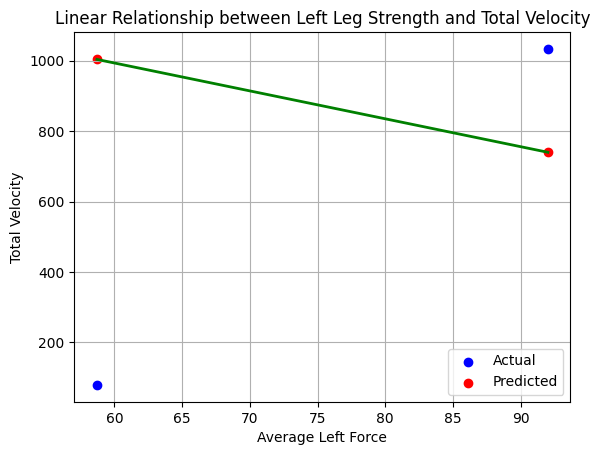

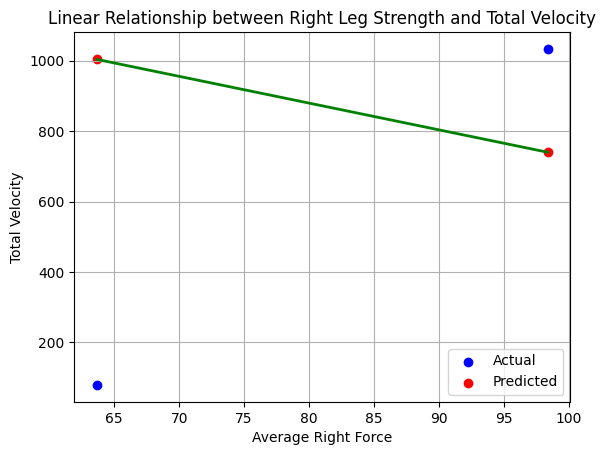

In [15]:
# Plotting for left leg strength
plt.scatter(X_test['Average Left Force'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Average Left Force'], y_pred, color='red', label='Predicted')
plt.plot(X_test['Average Left Force'], y_pred, color='green', linewidth=2)
plt.title('Linear Relationship between Left Leg Strength and Total Velocity')
plt.xlabel('Average Left Force')
plt.ylabel('Total Velocity')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for right leg strength
plt.scatter(X_test['Average Right Force'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Average Right Force'], y_pred, color='red', label='Predicted')
plt.plot(X_test['Average Right Force'], y_pred, color='green', linewidth=2)
plt.title('Linear Relationship between Right Leg Strength and Total Velocity')
plt.xlabel('Average Right Force')
plt.ylabel('Total Velocity')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Print out the column names to verify the correct column names
print(merged_data.columns)

Index(['Player_ID', 'Average Left Force', 'Average Right Force',
       'Acceleration B2 Distance (Gen 2) (m)',
       'Acceleration B3 Distance (Gen 2) (m)',
       'Deceleration B2 Distance (Gen 2) (m)',
       'Deceleration B3 Distance (Gen 2) (m)',
       'Velocity Band 6 Total Distance (m)',
       'Velocity Band 7 Total Distance (m)',
       'Velocity Band 8 Total Distance (m)', 'Total_Velocity'],
      dtype='object')


In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model using statsmodels with the correct column names
model = ols('Total_Velocity ~ Q("Average Left Force") + Q("Average Right Force")', data=merged_data).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_results)

                                sum_sq   df         F    PR(>F)
Q("Average Left Force")   7.182419e+04  1.0  0.118525  0.744646
Q("Average Right Force")  1.180356e+05  1.0  0.194784  0.677396
Residual                  3.029910e+06  5.0       NaN       NaN


    Player_ID  Acceleration B2 Distance (Gen 2) (m)  \
0  USER AVE0E                                206.36   
1  USER BVE0M                                 78.12   
2  USER LVE0K                                119.27   
3  USER MVE0K                                 35.38   
4  USER TVE0A                                 31.28   

   Acceleration B3 Distance (Gen 2) (m)  Deceleration B2 Distance (Gen 2) (m)  \
0                                  1.07                                118.73   
1                                 11.10                                 90.84   
2                                  1.77                                 89.01   
3                                  0.00                                 27.08   
4                                  1.74                                 26.98   

   Deceleration B3 Distance (Gen 2) (m)  Velocity Band 6 Total Distance (m)  \
0                                 14.02                          1411.80000   
1                       

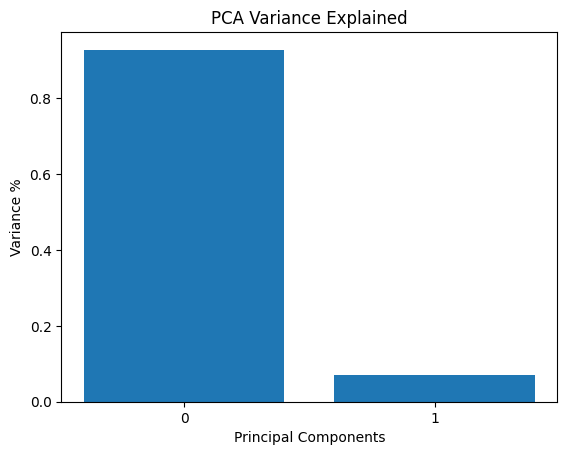

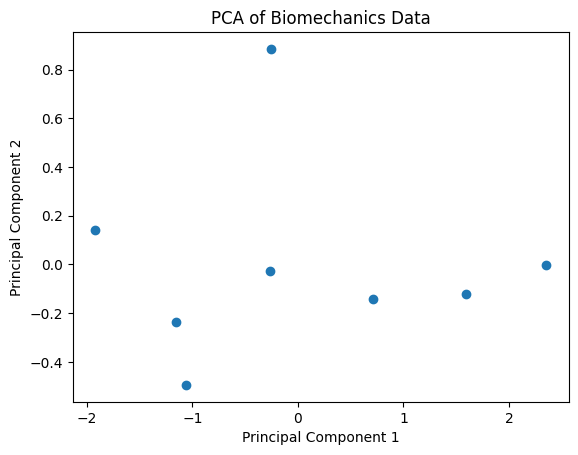

In [22]:
scaler = StandardScaler()
# Separate out the numerical data for scaling
numerical_features = average_forces_df.select_dtypes(include=[np.number])

# Apply the scaler to the numerical features
scaler = StandardScaler()
biomechanics_standardized = scaler.fit_transform(numerical_features)

# Apply PCA to the standardized numerical features
pca = PCA(n_components=2)  # Choose the number of components you want to keep
principal_components = pca.fit_transform(biomechanics_standardized)

# Convert the principal components into a DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Assuming 'grouped_data' retains the original index, we can concatenate the PCA results back using the index
grouped_data = grouped_data.reset_index(drop=True)
biomechanics_with_pca = pd.concat([grouped_data, pca_df], axis=1)

# Print the first few rows to check the PCA results added correctly
print(biomechanics_with_pca.head())

# Now you can use 'biomechanics_with_pca' for further analysis, for example to merge with tracking data
# ...

# To visualize the variance explained by each principal component
plt.figure()
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(range(pca.n_components_))
plt.title('PCA Variance Explained')
plt.show()

# To plot the principal components
plt.figure()
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Biomechanics Data')
plt.show()

                                      Principal Component 1  \
Acceleration B2 Distance (Gen 2) (m)               0.071563   
Acceleration B3 Distance (Gen 2) (m)              -0.046283   
Deceleration B2 Distance (Gen 2) (m)               0.116855   
Deceleration B3 Distance (Gen 2) (m)               0.385545   
Velocity Band 6 Total Distance (m)                 0.090738   
Velocity Band 7 Total Distance (m)                 0.314396   
Velocity Band 8 Total Distance (m)                -0.230216   

                                      Principal Component 2  
Acceleration B2 Distance (Gen 2) (m)              -0.330041  
Acceleration B3 Distance (Gen 2) (m)              -0.348565  
Deceleration B2 Distance (Gen 2) (m)              -0.440656  
Deceleration B3 Distance (Gen 2) (m)              -0.595773  
Velocity Band 6 Total Distance (m)                -0.283511  
Velocity Band 7 Total Distance (m)                -0.108001  
Velocity Band 8 Total Distance (m)                -0.290339  

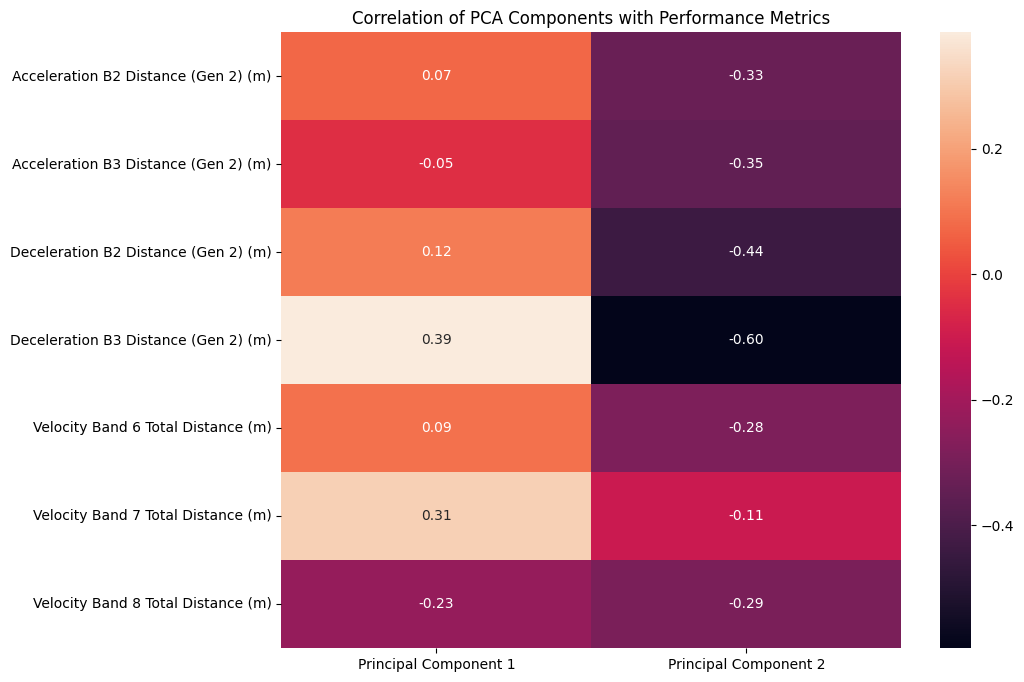

Model R^2 Score: -1.0664


In [25]:
biomechanics_with_pca['Player_ID'] = grouped_data['Player_ID']

# Merge the PCA results with the tracking data
# Use an outer join to keep all players, even if they don't have corresponding data in both datasets
combined_data = pd.merge(grouped_data, biomechanics_with_pca, on='Player_ID', how='outer')

# To avoid FutureWarning, explicitly specify numeric_only=True if you only want to correlate numerical columns
correlation_matrix = combined_data.corr(numeric_only=True)

# Filter out columns ending with '_y'
to_drop = [col for col in combined_data.columns if col.endswith('_y')]
combined_data.drop(columns=to_drop, inplace=True)

# Rename columns to remove the '_x' suffix
combined_data.rename(columns=lambda x: x.rstrip('_x'), inplace=True)

# Now, you can calculate the correlations as before
correlation_matrix = combined_data.corr(numeric_only=True)

# Ensure that you use the correct column names after renaming
filtered_columns = ['Acceleration B2 Distance (Gen 2) (m)',
                    'Acceleration B3 Distance (Gen 2) (m)',
                    'Deceleration B2 Distance (Gen 2) (m)',
                    'Deceleration B3 Distance (Gen 2) (m)',
                    'Velocity Band 6 Total Distance (m)',
                    'Velocity Band 7 Total Distance (m)',
                    'Velocity Band 8 Total Distance (m)']

# Extract the correlations
pca_correlations = correlation_matrix.loc[['Principal Component 1', 'Principal Component 2'], filtered_columns].transpose()

print(pca_correlations)


# For visualizing the correlation matrix as a heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlations, annot=True, fmt=".2f")
plt.title('Correlation of PCA Components with Performance Metrics')
plt.show()

# Advanced Analysis Example: Multiple Linear Regression
# Assume 'combined_data' has no missing values for the columns used below
X = combined_data[['Principal Component 1', 'Principal Component 2']]  # Independent variables

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Evaluate the model using the test data
y_pred = linear_model.predict(X_test)
print(f"Model R^2 Score: {linear_model.score(X_test, y_test):.4f}")
